In [1]:
# Libraries
import numpy as np # numerical computation
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import preprocess_email_campaign as pec

In [2]:
# Load and first view
path = 'data/data_email_campaign.csv' # path
df = pd.read_csv(path) # read data
df.head() # first view

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [3]:
# Data details
print('shape : ',df.shape)
print('# of duplicate rows : ',df.duplicated().sum())
print('columns : ',list(df.columns))
print()
print('Null count in each column :')
print(df.isna().sum())
print()
print('Unique count in each column :')
print(df.nunique())

shape :  (68353, 12)
# of duplicate rows :  0
columns :  ['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type', 'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications', 'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images', 'Email_Status']

Null count in each column :
Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

Unique count in each column :
Email_ID                     68353
Email_Type                       2
Subject_Hotness_Score           51
Email_Source_Type                2
Customer_Location                7
Email_Campaign_Type              3
Total

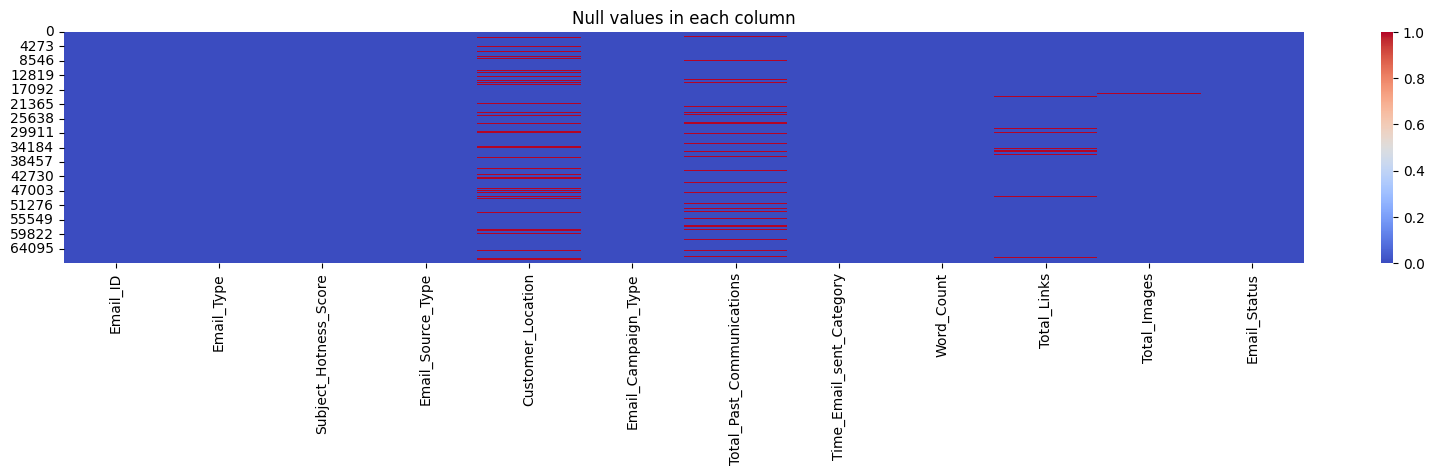

In [4]:
plt.figure(figsize=(20,3))
sns.heatmap(df.isna(), cmap='coolwarm')
plt.title('Null values in each column')
plt.show()

In [5]:
# Unique values
for col in df.columns[1:]:
    print('Unique values in column :',col)
    print(list(df[col].unique()))
    print()

Unique values in column : Email_Type
[np.int64(1), np.int64(2)]

Unique values in column : Subject_Hotness_Score
[np.float64(2.2), np.float64(2.1), np.float64(0.1), np.float64(3.0), np.float64(0.0), np.float64(1.5), np.float64(3.2), np.float64(0.7), np.float64(2.0), np.float64(0.5), np.float64(0.2), np.float64(1.0), np.float64(4.0), np.float64(1.9), np.float64(1.1), np.float64(1.6), np.float64(0.3), np.float64(2.3), np.float64(1.4), np.float64(1.7), np.float64(2.8), np.float64(1.2), np.float64(0.8), np.float64(0.6), np.float64(4.2), np.float64(1.8), np.float64(2.4), np.float64(0.9), np.float64(1.3), np.float64(3.3), np.float64(2.6), np.float64(3.1), np.float64(4.1), np.float64(2.9), np.float64(2.7), np.float64(0.4), np.float64(3.5), np.float64(3.7), np.float64(2.5), np.float64(3.8), np.float64(3.9), np.float64(3.4), np.float64(4.6), np.float64(4.5), np.float64(3.6), np.float64(4.4), np.float64(4.7), np.float64(5.0), np.float64(4.3), np.float64(4.8), np.float64(4.9)]

Unique values in c

In [6]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [7]:
# Describe
df.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


1. Customer_Location and Total_Past_Communication have more than 6000 rows contain null/missing values.
2. From mean, median, std I could not find outliers.

## EDA

In [8]:
# EDA
pec_obj = pec.PreprocessEmailCompaign(df.copy())
pec_obj.nullHandler()
pec_df = pec_obj.df

emailTypeCount = pec_df['Email_Type'].value_counts()
emailSourceTypeCount = pec_df['Email_Source_Type'].value_counts()
emailCampaignTypeCount = pec_df['Email_Campaign_Type'].value_counts()
timeEmailSentCategoryCount = pec_df['Time_Email_sent_Category'].value_counts()
emailStatusCount = pec_df['Email_Status'].value_counts()
print('# of email in each email type :')
print(emailTypeCount.reset_index())
print()
print('# of email in each email source type :')
print(emailSourceTypeCount.reset_index())
print()
print('# of email in each email compaign type :')
print(emailCampaignTypeCount.reset_index())
print()
print('# of email in each time email sent :')
print(timeEmailSentCategoryCount.reset_index())
print()
print('# of email in each email status type :')
print(emailStatusCount.reset_index())

# of email in each email type :
   Email_Type  count
0           1  48866
1           2  19487

# of email in each email source type :
   Email_Source_Type  count
0                  1  37149
1                  2  31204

# of email in each email compaign type :
   Email_Campaign_Type  count
0                    2  48273
1                    3  19344
2                    1    736

# of email in each time email sent :
   Time_Email_sent_Category  count
0                         2  41129
1                         1  13636
2                         3  13588

# of email in each email status type :
   Email_Status  count
0             0  54941
1             1  11039
2             2   2373


#### What insights you got?
1. EmailType has two type of emails 1 and 2. type 1 contains more than 48000 emails while type 2 contains less than 20000.
2. Email Source Type has two type of email sources 1 and 2. type 1 has 37149 and type 2 has 31204 emails.
3. Email Compaign Type contains 3 type of emails 1,2,3. type 1 has only 736 emails, while type has about 20000 and type 3 has more than 48000 emails.
4. TimeEmailSent is a categorical column represent morning, evening and night by numbers 1,2,3. 1 and 3 have less  than 14000 emails while 2 has more than 40000.
5. EmailStatus is our target variable which contains 0, 1, 2 categories. here 0 means ignore, 1 means read and 2  means acknowledged. 0 has about 55000 emails, 1 has about 11000 while 2 has less than 2500.<br>
*Note :* Classes in target columns are imbalanced that is not good for ML model therefore We have to make them balanced. By using under-sampling/over-sampling techniques.

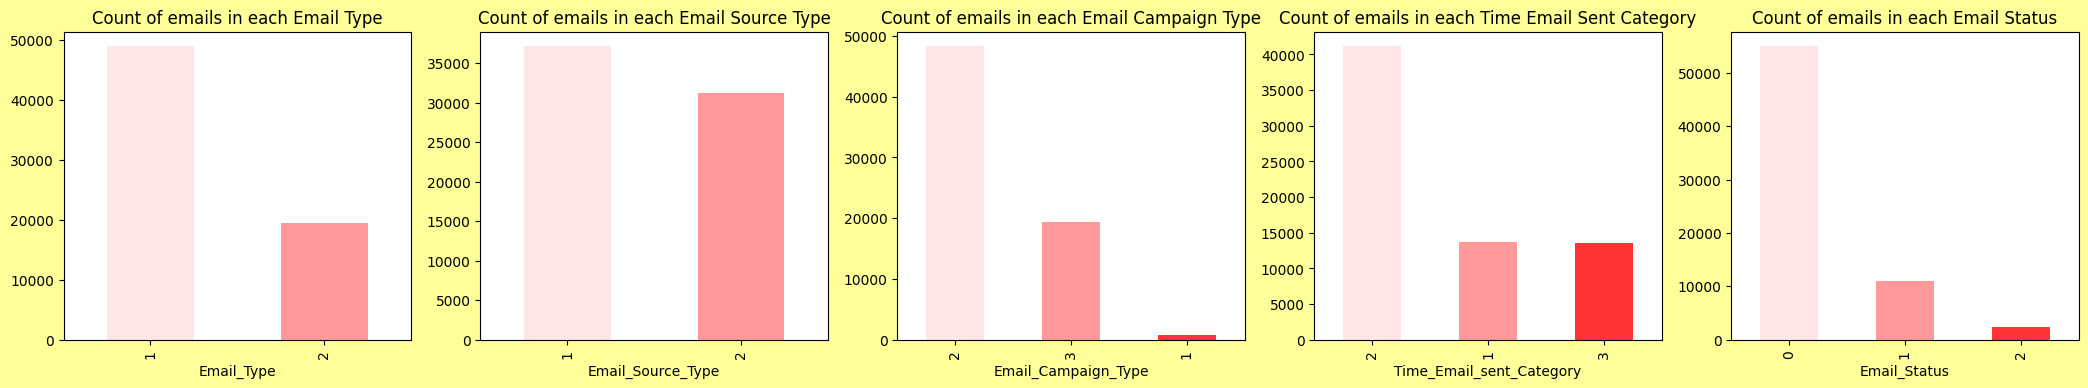

In [9]:
facecolor = "#ffff99"
colors = ['#ffe6e6', '#ff9999', '#ff3333']
fig,ax = plt.subplots(nrows=1, ncols=5, figsize=(26,4), facecolor = facecolor)
emailTypeCount.plot.bar(ax=ax[0], color= colors)
ax[0].set_title('Count of emails in each Email Type')
emailSourceTypeCount.plot.bar(ax=ax[1], color=colors)
ax[1].set_title('Count of emails in each Email Source Type')
emailCampaignTypeCount.plot.bar(ax=ax[2], color=colors)
ax[2].set_title('Count of emails in each Email Campaign Type')
timeEmailSentCategoryCount.plot.bar(ax=ax[3], color=colors)
ax[3].set_title('Count of emails in each Time Email Sent Category')
emailStatusCount.plot.bar(ax=ax[4], color=colors)
ax[4].set_title('Count of emails in each Email Status')
plt.show()

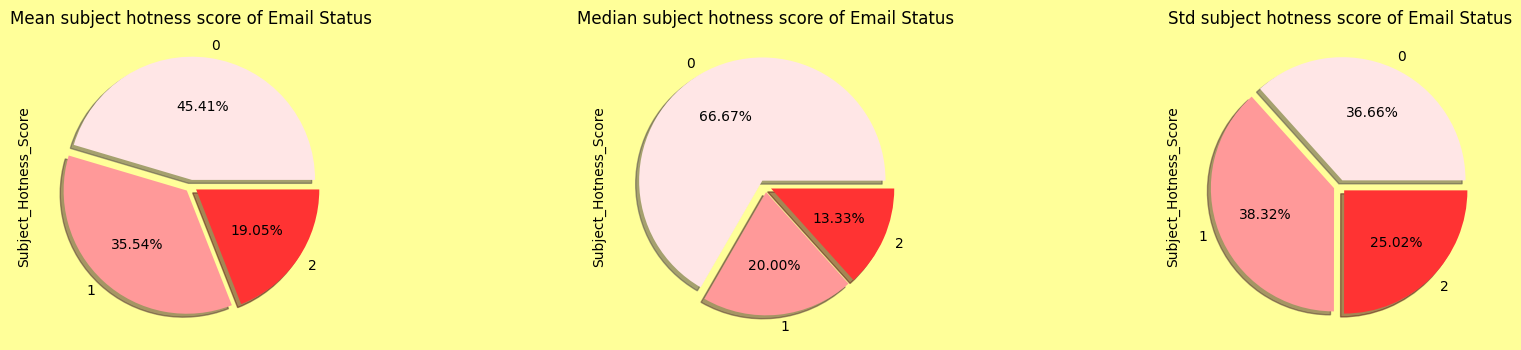

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(21,4), facecolor=facecolor)
pec_df.groupby(['Email_Status'])['Subject_Hotness_Score'].mean().plot.pie(ax=ax[0], autopct='%0.2f%%', shadow=True, colors=colors, explode=[0.05,0.05,0.05])
ax[0].set_title('Mean subject hotness score of Email Status')
pec_df.groupby(['Email_Status'])['Subject_Hotness_Score'].median().plot.pie(ax=ax[1], autopct='%0.2f%%', shadow=True, colors=colors, explode=[0.05,0.05,0.05])
ax[1].set_title('Median subject hotness score of Email Status')
pec_df.groupby(['Email_Status'])['Subject_Hotness_Score'].std().plot.pie(ax=ax[2], autopct='%0.2f%%', shadow=True, colors=colors, explode=[0.05,0.05,0.05])
ax[2].set_title('Std subject hotness score of Email Status')
plt.show()

<Figure size 1600x400 with 0 Axes>

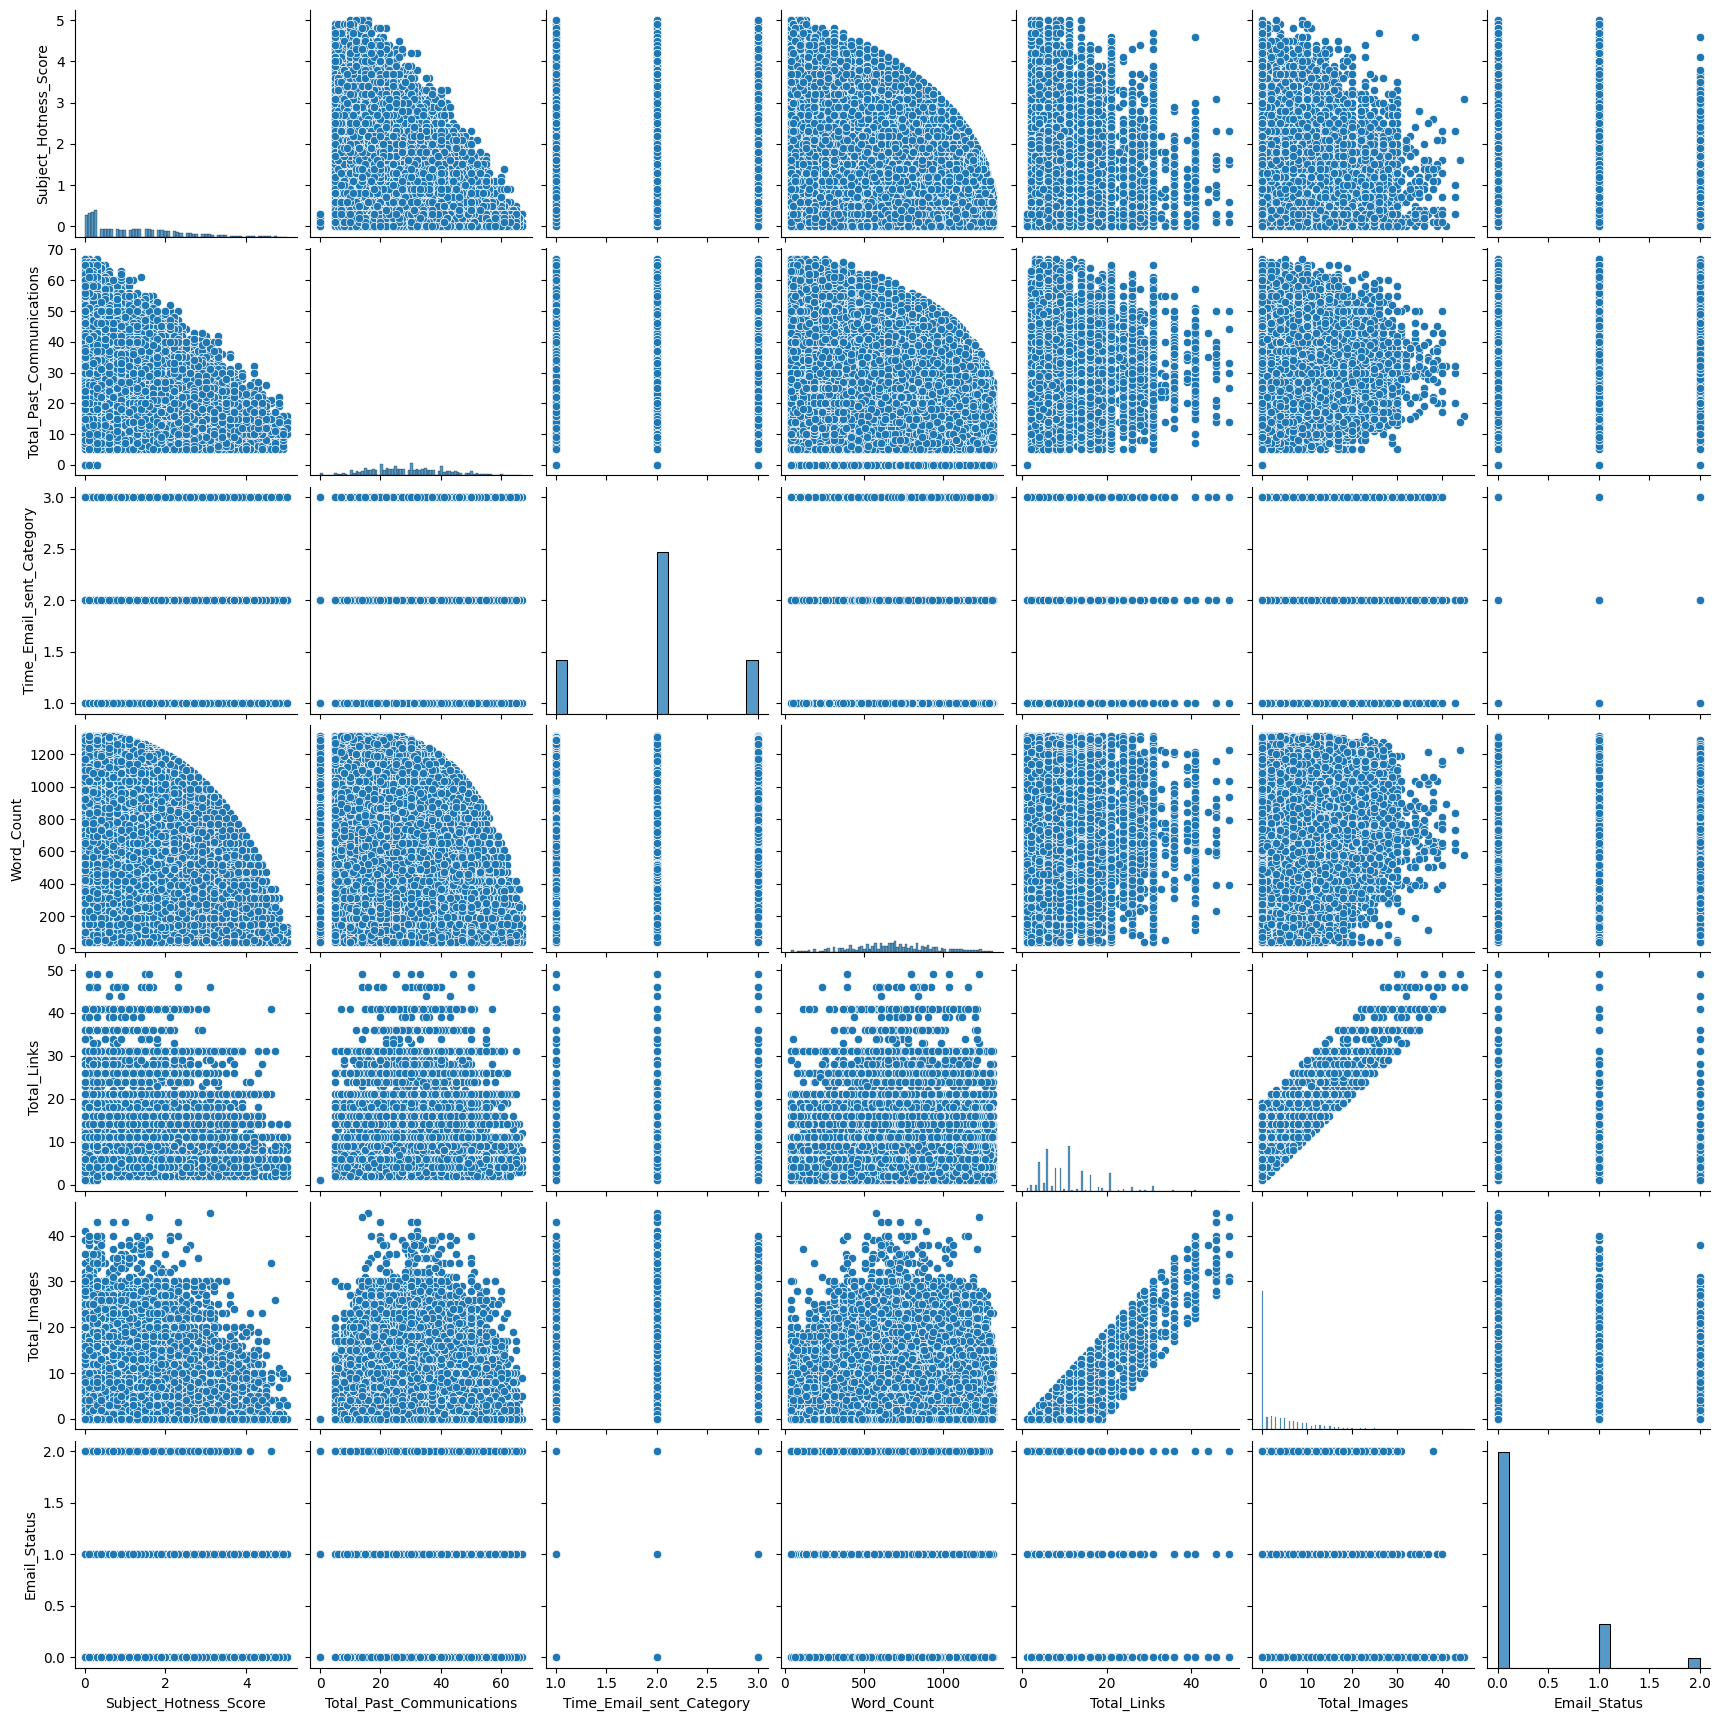

In [11]:
plt.figure(figsize=(16,4))
numeric_cols = ['Subject_Hotness_Score', 'Total_Past_Communications', 'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images', 'Email_Status']
sns.pairplot(df[numeric_cols])
plt.show()

Could not find any pattern except Total_Links and Total_Images has linear relationship.

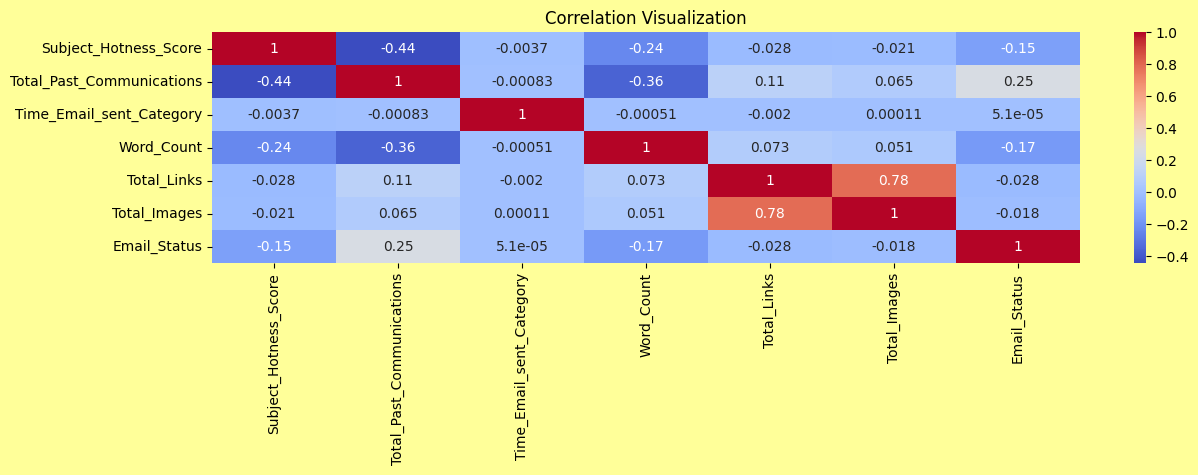

In [12]:
plt.figure(figsize=(14,3), facecolor=facecolor)
sns.heatmap(df[numeric_cols].corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Visualization')
plt.show()

1. Total_links and Total_Images are highly correlated with each other therefore we have to remove one of them or both of them because they are independent variables.
2. Word Count is highly correlated with Subject_Hotness_Score and Total_Past_Communications.